In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv("C:/Users/DELL/Downloads/kc_house_data.csv/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
import datetime
ab=list(range(0,21613))
cde=list(range(0,21613))

In [4]:
for i in list(range(0,21613)):
    ob=data['date'][i][:8]
    ab=datetime.datetime.strptime(ob,'%Y%m%d')
    cde[i]=ab.strftime('%d/%m/%Y')

In [5]:
data['date']=cde

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,13/10/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,09/12/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,25/02/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,09/12/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,18/02/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

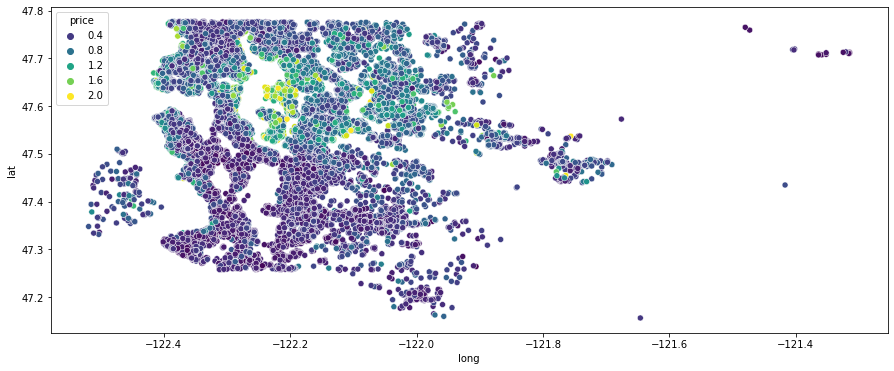

In [8]:
new_data=data.loc[(data['price']<=2000000)]
plt.figure(figsize=(15,6))
sns.scatterplot(x='long',y='lat',data=new_data,hue='price',palette='viridis')

<AxesSubplot:xlabel='zipcode', ylabel='price'>

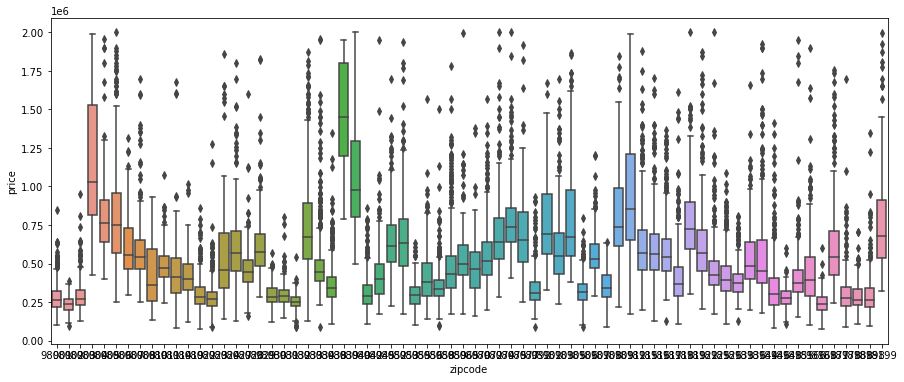

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(x='zipcode',y='price',data=new_data)

In [10]:
new_data['date']=pd.to_datetime(new_data['date'])

<ipython-input-10-a2a54233d77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['date']=pd.to_datetime(new_data['date'])


In [11]:
new_data.drop('id',axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
new_data['year']=new_data['date'].apply(lambda date:date.year)
new_data['month']=new_data['date'].apply(lambda date:date.month)

<ipython-input-12-b5b05a954408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['year']=new_data['date'].apply(lambda date:date.year)
<ipython-input-12-b5b05a954408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month']=new_data['date'].apply(lambda date:date.month)


In [13]:
new_data.drop('date',axis=1,inplace=True)

In [14]:
zip_ordered=new_data.groupby(['zipcode'])['price'].mean().sort_values().index
zip_ordered={k:i for i,k in enumerate(zip_ordered,0)}

<AxesSubplot:ylabel='Count'>

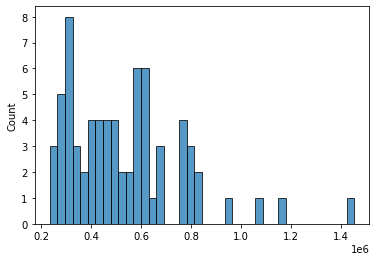

In [15]:
sns.histplot(new_data.groupby(['zipcode'])['price'].mean().sort_values().values,bins=40)

In [18]:
new_data.drop('zipcode',axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [27]:
x= new_data.drop('price',axis=1).values
y= new_data['price'].values

In [30]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train, y_test= tts(x,y,test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler as mms
scalar=mms()

In [32]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [33]:
x_train.shape

(14990, 19)

In [34]:
from tensorflow.keras.models import Sequential as ss
from tensorflow.keras.layers import Dense as dn

In [61]:
model=ss()

model.add(dn(19,activation ='relu'))
model.add(dn(19,activation ='relu'))
model.add(dn(19,activation ='relu'))
model.add(dn(19,activation ='relu'))

model.add(dn(1))
model.compile(optimizer='adam', loss='mse')

In [62]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
118/118 [==============================] - 2s 3ms/step - loss: 353793540096.0000 - val_loss: 349794762752.0000
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 352631357440.0000 - val_loss: 345861488640.0000
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 337575739392.0000 - val_loss: 312104026112.0000
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 267914543104.0000 - val_loss: 201177350144.0000
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 134568468480.0000 - val_loss: 77576921088.0000
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 62971228160.0000 - val_loss: 58239770624.0000
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 57199841280.0000 - val_loss: 57286721536.0000
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 56247128064.0000 - val_loss: 56350310400.0000
Epoch 9/400
118/118 [==

118/118 [==============================] - 0s 3ms/step - loss: 25408157696.0000 - val_loss: 25539053568.0000
Epoch 69/400
118/118 [==============================] - 0s 3ms/step - loss: 25322164224.0000 - val_loss: 25471424512.0000
Epoch 70/400
118/118 [==============================] - 0s 2ms/step - loss: 25288417280.0000 - val_loss: 25401737216.0000
Epoch 71/400
118/118 [==============================] - 0s 2ms/step - loss: 25200631808.0000 - val_loss: 25361805312.0000
Epoch 72/400
118/118 [==============================] - 0s 2ms/step - loss: 25153718272.0000 - val_loss: 25274890240.0000
Epoch 73/400
118/118 [==============================] - 0s 2ms/step - loss: 25068965888.0000 - val_loss: 25249978368.0000
Epoch 74/400
118/118 [==============================] - 0s 2ms/step - loss: 25005625344.0000 - val_loss: 25135781888.0000
Epoch 75/400
118/118 [==============================] - ETA: 0s - loss: 25289193472.000 - 0s 2ms/step - loss: 24931608576.0000 - val_loss: 25079668736.0000
Epo

118/118 [==============================] - 0s 3ms/step - loss: 22632288256.0000 - val_loss: 22874226688.0000
Epoch 135/400
118/118 [==============================] - 0s 2ms/step - loss: 22606282752.0000 - val_loss: 22855778304.0000
Epoch 136/400
118/118 [==============================] - 0s 3ms/step - loss: 22580248576.0000 - val_loss: 22841815040.0000
Epoch 137/400
118/118 [==============================] - 0s 3ms/step - loss: 22572908544.0000 - val_loss: 22826223616.0000
Epoch 138/400
118/118 [==============================] - 0s 4ms/step - loss: 22527827968.0000 - val_loss: 22807965696.0000
Epoch 139/400
118/118 [==============================] - 0s 3ms/step - loss: 22516537344.0000 - val_loss: 22770794496.0000
Epoch 140/400
118/118 [==============================] - 0s 3ms/step - loss: 22482020352.0000 - val_loss: 22814810112.0000
Epoch 141/400
118/118 [==============================] - 0s 2ms/step - loss: 22481332224.0000 - val_loss: 22734548992.0000
Epoch 142/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 21554782208.0000 - val_loss: 21958625280.0000
Epoch 201/400
118/118 [==============================] - 0s 2ms/step - loss: 21519560704.0000 - val_loss: 21980299264.0000
Epoch 202/400
118/118 [==============================] - 0s 2ms/step - loss: 21511317504.0000 - val_loss: 21982255104.0000
Epoch 203/400
118/118 [==============================] - 0s 2ms/step - loss: 21508167680.0000 - val_loss: 21935187968.0000
Epoch 204/400
118/118 [==============================] - 0s 2ms/step - loss: 21492965376.0000 - val_loss: 21931982848.0000
Epoch 205/400
118/118 [==============================] - 0s 2ms/step - loss: 21477480448.0000 - val_loss: 21926475776.0000
Epoch 206/400
118/118 [==============================] - 0s 2ms/step - loss: 21473542144.0000 - val_loss: 21923006464.0000
Epoch 207/400
118/118 [==============================] - 0s 2ms/step - loss: 21485639680.0000 - val_loss: 21909047296.0000
Epoch 208/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 21107736576.0000 - val_loss: 21679435776.0000
Epoch 267/400
118/118 [==============================] - 0s 2ms/step - loss: 21125502976.0000 - val_loss: 21667989504.0000
Epoch 268/400
118/118 [==============================] - 0s 2ms/step - loss: 21098121216.0000 - val_loss: 21675962368.0000
Epoch 269/400
118/118 [==============================] - 0s 2ms/step - loss: 21084401664.0000 - val_loss: 21671170048.0000
Epoch 270/400
118/118 [==============================] - 0s 2ms/step - loss: 21080315904.0000 - val_loss: 21655998464.0000
Epoch 271/400
118/118 [==============================] - 0s 2ms/step - loss: 21083951104.0000 - val_loss: 21675546624.0000
Epoch 272/400
118/118 [==============================] - 0s 2ms/step - loss: 21105428480.0000 - val_loss: 21738924032.0000
Epoch 273/400
118/118 [==============================] - 0s 2ms/step - loss: 21056581632.0000 - val_loss: 21885696000.0000
Epoch 274/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 20724680704.0000 - val_loss: 21439727616.0000
Epoch 333/400
118/118 [==============================] - 0s 2ms/step - loss: 20737093632.0000 - val_loss: 21425582080.0000
Epoch 334/400
118/118 [==============================] - 0s 2ms/step - loss: 20705976320.0000 - val_loss: 21430925312.0000
Epoch 335/400
118/118 [==============================] - 0s 2ms/step - loss: 20703952896.0000 - val_loss: 21410543616.0000
Epoch 336/400
118/118 [==============================] - 0s 2ms/step - loss: 20714379264.0000 - val_loss: 21411516416.0000
Epoch 337/400
118/118 [==============================] - 0s 2ms/step - loss: 20697313280.0000 - val_loss: 21431078912.0000
Epoch 338/400
118/118 [==============================] - 0s 2ms/step - loss: 20695783424.0000 - val_loss: 21394028544.0000
Epoch 339/400
118/118 [==============================] - 0s 2ms/step - loss: 20691785728.0000 - val_loss: 21391499264.0000
Epoch 340/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 20285726720.0000 - val_loss: 21071370240.0000
Epoch 399/400
118/118 [==============================] - 0s 2ms/step - loss: 20261619712.0000 - val_loss: 21217976320.0000
Epoch 400/400
118/118 [==============================] - 0s 2ms/step - loss: 20256266240.0000 - val_loss: 21044674560.0000


<AxesSubplot:>

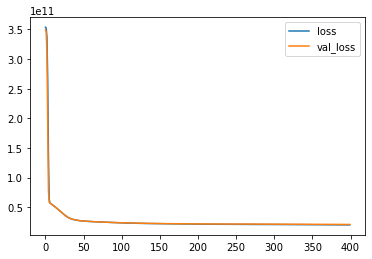

In [63]:
pd.DataFrame(model.history.history).plot()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions= model.predict(x_test)

In [65]:
np.sqrt(mean_squared_error(y_test,predictions))

145067.8248604272

In [66]:
mean_absolute_error(y_test,predictions)

96152.882942607

In [67]:
new_data['price'].describe()

count    2.141500e+04
mean     5.194207e+05
std      2.878146e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      2.000000e+06
Name: price, dtype: float64

In [68]:
explained_variance_score(y_test,predictions)

0.7474458581371208

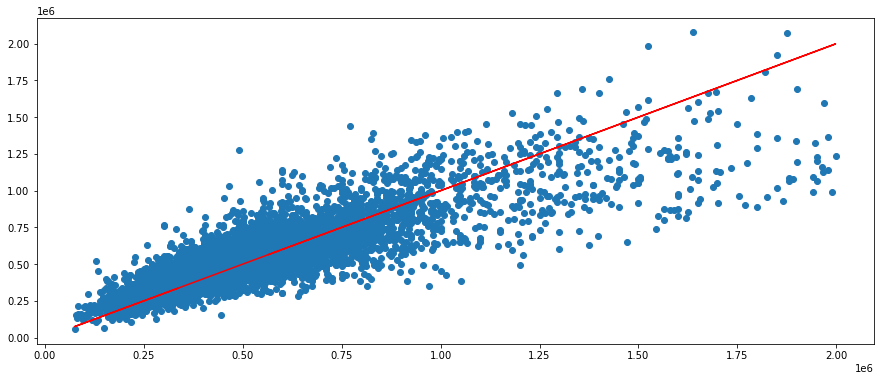

In [69]:
plt.figure(figsize=(15,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

## Therefore model seems to be good till 800000 to 1 million dollars after which it is an absolute worst fit.

In [70]:
single_house=new_data.drop('price',axis=1).iloc[0]

In [71]:
new_house=single_house.values.reshape(-1,19)

In [72]:
model.predict(new_house)

array([[4.1108503e+09]], dtype=float32)